<a href="https://colab.research.google.com/github/sabbir-ahmed16/neural-and-fuzzy-sessional/blob/main/1608012_ETE_456_R01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Objectives:
- To apply various regression algorithms on real world dataset.

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Downloading and Reading the Dataset

<b>Some basic information provided with the dataset are - </b>
- The column names are:
  - <b>Age:</b> Age of primary beneficiary.
  - <b>Sex:</b> Insurance contractor gender.
  - <b>BMI:</b> Body Mass Index, providing an understanding of body weight with respect to the body height.
  - <b>Children:</b> Number of children covered by health insurance / Number of dependents.
  - <b>Smoker:</b> Does the person smoke or not?
  - <b>Region:</b> The beneficiary's residential area in the US.
  - <b>Charges:</b> Individual medical costs billed by health insurance.

In [2]:
dataset = pd.read_csv("https://www.dropbox.com/s/mwgqgjbmfw0xa5p/insurance.csv?dl=1")

### Extracting Basic Information from the Dataset
- What information are given?
- How many columns are there in the dataset?
- What type of data each column contains?
- What is the size of the dataset?

In [3]:
# Displaying first 10 rows
dataset.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [4]:
dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
# Size of the dataset
dataset.shape

(1338, 7)

### Analyzing the Dataset
- Check if there is any `Null`, `NaN`, `NA` or missing values.
- Handling the missing values.
- To check correlation between the features and the target value.
- Extracting feature and target vector for training ML algorithm.

> **Checking if there is any null values in any of the columns** - Required functions - `isnull()` and `isna()`

In [6]:
dataset.isnull().any()

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool

In [7]:
dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

<div class='alert alert-block alert-success'>
    <center><b>Since there is no null values e.g. <code>np.nan</code>, <code>NA</code> or <code>Null</code> in the dataset, there is no need to handle the missing values.</b></center>
</div>

> **Checking correlation between the target and the various features to extract best features.**

In [8]:
age = dataset['age']
bmi = dataset['bmi']
children = dataset['children']
target = dataset['charges']

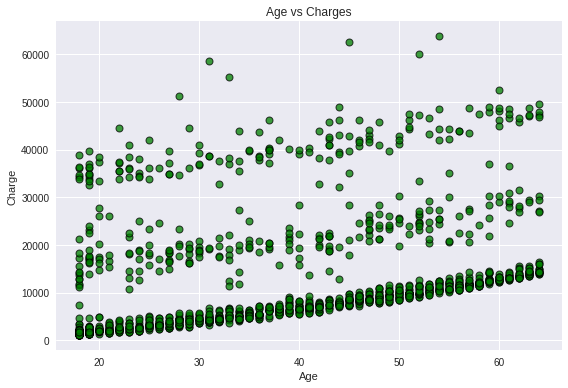

In [9]:
%matplotlib inline
plt.style.use('seaborn')

plt.scatter(age, target, edgecolor='black', c='green', linewidth=1, alpha=0.75)

plt.title('Age vs Charges')
plt.xlabel('Age')
plt.ylabel('Charge')
plt.tight_layout()
plt.show()

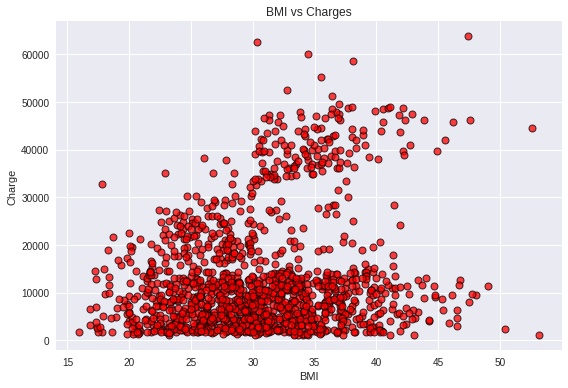

In [10]:
plt.style.use('seaborn')

plt.scatter(bmi, target, edgecolor='black', c='red', linewidth=1, alpha=0.75)

plt.title('BMI vs Charges')
plt.xlabel('BMI')
plt.ylabel('Charge')
plt.tight_layout()
plt.show()

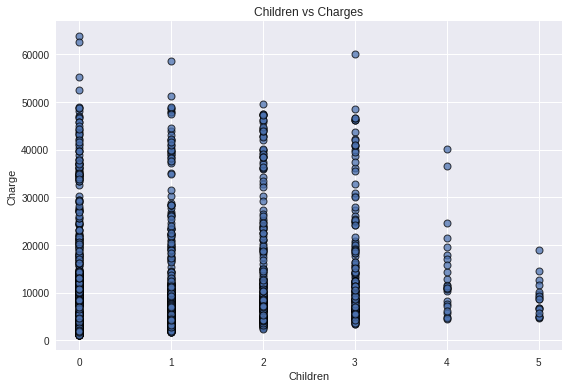

In [11]:
plt.style.use('seaborn')

plt.scatter(children, target, edgecolor='black', linewidth=1, alpha=0.75)

plt.title('Children vs Charges')
plt.xlabel('Children')
plt.ylabel('Charge')
plt.tight_layout()
plt.show()

In [12]:
sex = dataset['sex']
smoker = dataset['smoker']
region = dataset['region']

In [13]:
male = sex.value_counts()['male']
female = sex.value_counts()['female']

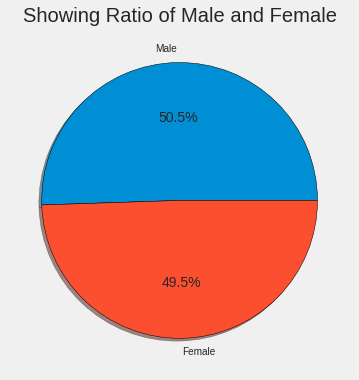

In [14]:
plt.style.use('fivethirtyeight')

slices = [male, female]
labels = ['Male', 'Female']

plt.pie(slices, labels=labels, shadow=True, autopct='%1.1f%%', wedgeprops={'edgecolor': 'black'})
plt.title('Showing Ratio of Male and Female')
plt.tight_layout()
plt.show()

In [15]:
yes = smoker.value_counts()['yes']
no = smoker.value_counts()['no']

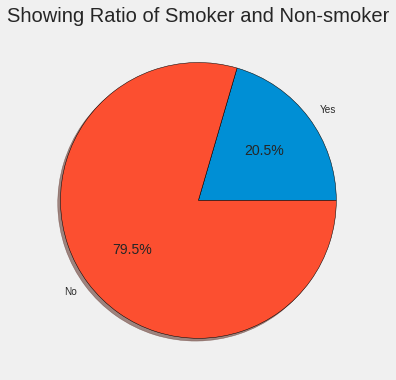

In [16]:
plt.style.use('fivethirtyeight')

slices = [yes, no]
labels = ['Yes', 'No']

plt.pie(slices, labels=labels, shadow=True, autopct='%1.1f%%', wedgeprops={'edgecolor': 'black'})
plt.title('Showing Ratio of Smoker and Non-smoker')
plt.tight_layout()
plt.show()

In [17]:
northeast = region.value_counts()['northeast']
northwest = region.value_counts()['northwest']
southeast = region.value_counts()['southeast']
southwest = region.value_counts()['southwest']

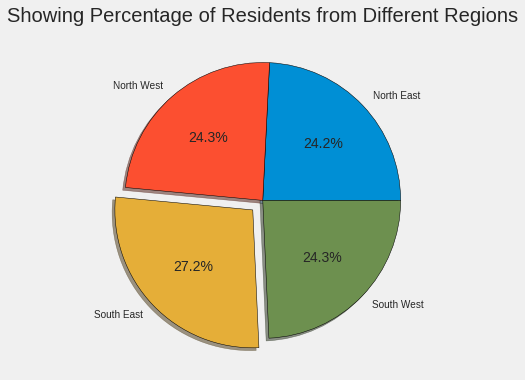

In [18]:
plt.style.use('fivethirtyeight')

slices = [northeast, northwest, southeast, southwest]
labels = ['North East', 'North West', 'South East', 'South West']
explode = [0, 0, 0.1, 0]

plt.pie(slices, labels=labels, shadow=True, explode=explode, autopct='%1.1f%%', wedgeprops={'edgecolor': 'black'})
plt.title('Showing Percentage of Residents from Different Regions')
plt.tight_layout()
plt.show()

### Splitting the Dataset into Features and Target

In [19]:
features = dataset[['age', 'sex', 'bmi', 'children', 'smoker', 'region']]
target = dataset[['charges']]

<div class='alert alert-block alert-info'>
    <b>The scatter plots shows that there is weak correlation between the features BMI, AGE and CHILDREN with the MEDICAL CHARGE.</b>
</div>

### Encoding Textual/Categorical Features
- These features are typically stored as text values which represent various traits of the observations.
  - The categorical features which do not have any order of precedence are called nominal features. e.g. gender - male, female
  - Features which have some order associated with them are called ordinal features. e.g. economic status - low, medium and high.
- Categorical features may have a very large number of levels, known as high cardinality. For example - cities.
- Two types of encoding will be used -
  - <b>Label Encoding</b>
    - It encodes the categorical values by numerical values between 0 and no_categories -1. It has one disadvantage that the numerical values can be misinterpreted by the algorithm as larger numerical value will be given more weight by the algorithm.
    
  - <b>One-Hot Encoding</b>
    - The disadvantage of the label encoding has been overcome by one-hot encoding. It converts each category value into a new column and assign a 1 or 0 value to the column.

In [20]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [21]:
# Label Encoding
le = LabelEncoder()

le_sex = pd.DataFrame(le.fit_transform(features['sex']))
le_smoker = pd.DataFrame(le.fit_transform(features['smoker']))
le_region = pd.DataFrame(le.fit_transform(features['region']))

In [22]:
# Dropping categorical features from the feature vectors
numeric_features = features.drop(['sex', 'region', 'smoker'], axis=1)

# Concatenating numerical features with encoded features
le_features = pd.concat([numeric_features, le_sex, le_smoker, le_region], axis=1)

In [23]:
le_features.columns = ['age', 'bmi', 'children', 'sex', 'smoker', 'region']
le_features.head(10)

,age,bmi,children,sex,smoker,region
0,19,27.900,0,0,1,3
1,18,33.770,1,1,0,2
2,28,33.000,3,1,0,2
3,33,22.705,0,1,0,1
4,32,28.880,0,1,0,1
5,31,25.740,0,0,0,2
6,46,33.440,1,0,0,2
7,37,27.740,3,0,0,1
8,37,29.830,2,1,0,0
9,60,25.840,0,0,0,1


In [24]:
# One-Hot Encoding
ohe_features = features
cat_columns = ['sex', 'smoker', 'region']
ohe = OneHotEncoder(sparse=False)

enc_features = ohe.fit_transform(ohe_features[cat_columns])
enc_df = pd.DataFrame(enc_features, index=ohe_features.index)
ohe_features = pd.concat([numeric_features, enc_df], axis=1)

In [25]:
ohe_features.head(10)

,age,bmi,children,0,1,2,3,4,5,6,7
0,19,27.900,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,18,33.770,1,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,28,33.000,3,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,33,22.705,0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,32,28.880,0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
5,31,25.740,0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
6,46,33.440,1,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
7,37,27.740,3,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
8,37,29.830,2,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
9,60,25.840,0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [26]:
ohe.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


array(['x0_female', 'x0_male', 'x1_no', 'x1_yes', 'x2_northeast',
       'x2_northwest', 'x2_southeast', 'x2_southwest'], dtype=object)

In [27]:
# Setting the columns names for the new One-Hot Encode dataset
ohe_features.columns = ['age', 'bmi', 'children', 'x0_female', 'x0_male', 'x1_no', 'x1_yes', 'x2_northeast',
                        'x2_northwest', 'x2_southeast', 'x2_southwest']

In [28]:
ohe_features.head(10)

,age,bmi,children,x0_female,x0_male,x1_no,x1_yes,x2_northeast,x2_northwest,x2_southeast,x2_southwest
0,19,27.900,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,18,33.770,1,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,28,33.000,3,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,33,22.705,0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,32,28.880,0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
5,31,25.740,0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
6,46,33.440,1,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
7,37,27.740,3,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
8,37,29.830,2,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
9,60,25.840,0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [29]:
from sklearn.model_selection import train_test_split

### Splitting the dataset into train and test set
- The dataset will be splitted into two for training and testing the model. $20\%$ of the data will be used for testing and the rest for training.

In [30]:
leX_train, leX_test, y_train, y_test = train_test_split(le_features, target, test_size = 0.2, random_state = 12)
oheX_train, oheX_test, y_train, y_test = train_test_split(le_features, target, test_size = 0.2, random_state = 12)

In [31]:
print(leX_train.shape)
print(leX_test.shape)

(1070, 6)
(268, 6)


### Feature Scaling

In [32]:
from sklearn.preprocessing import StandardScaler

In [33]:
X_sc = StandardScaler()
y_sc = StandardScaler()

# Scaling label encoded data
lenX_train = X_sc.fit_transform(leX_train[['age', 'bmi', 'children']])
lenX_test = X_sc.transform(leX_test[['age', 'bmi', 'children']])
ny_train = y_sc.fit_transform(y_train[['charges']])
ny_test = y_sc.transform(y_test[['charges']])

In [34]:
X_sc = StandardScaler()
y_sc = StandardScaler()

# Scaling one-hot encoded data
ohenX_train = X_sc.fit_transform(oheX_train[['age', 'bmi', 'children']])
ohenX_test = X_sc.transform(oheX_test[['age', 'bmi', 'children']])

###  Importing evaluation metrices
- **Mean Absolute Error**
  - A risk metric corresponding to the expected value of the absolute error loss or $l1$-norm loss.
  - If $\hat{y_i}$ is the predicted value of the $i$-th sample, and $y_i$ is the corresponding true value, then the mean absolute error (MAE) over $n_samples$ is defined as -

    $$MAE(y, \hat{y}) = \frac{1}{n_samples} \sum_{i=0}^{n_{samples} - 1} \left| y_i - \hat{y_i} \right|$$
  
- **Mean Squared Error**
  - A risk metric corresponding to the expected value of the squared (quadratic) error or loss
  - If $\hat{y_i}$ is the predicted value of the $i$-th sample, and $y_i$ is the corresponding true value, then the mean squared error (MSE) over $n_samples$ is defined as -
  
    $$MSE(y, \hat{y}) = \frac{1}{n_samples} \sum_{i=0}^{n_{samples} - 1}(y_i - \hat{y_i})^2$$
- **R2 Score**
  - It provides an indication of goodness of fit and therefore a measure of how well unseen samples are likely to be predicted by the model. Best possible score is $1.0$ and it can be negative because the model can be arbitrarily worse. A constant model that always predicts the expected value of y, disregarding the input features, would get a $R^2$ score of $0.0$
  - If $\hat{y_i}$ is the predicted value of the $i$-th sample and $y_i$ is the corresponding true value for total $n$ samples, the estimated $R^2$ is defined as - 
  $$R_2(y, \hat{y}) = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y_i})^2}{\sum_{i=1}^{n} (y_i - \bar{y_i})^2}$$
    
    where $\bar{y} = \frac{1}{n}\sum_{i=1}{n} y_i$ and $\sum_{i=1}^{n} (y_i - \hat{y_i})^2 = \sum_{i=1}^{n} \epsilon_i^2$

In [35]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

### Linear Regression
- **For label encoded features (Denormalized)**

In [36]:
from sklearn.linear_model import LinearRegression

In [37]:
# Training the model
lin_regressor = LinearRegression()
lin_regressor.fit(leX_train, y_train)

LinearRegression()

In [38]:
# Predicting on test set
led_lin_pred = lin_regressor.predict(leX_test)

In [39]:
print(f'Mean Absolute Error: {mean_absolute_error(y_test, led_lin_pred)}')
print(f'Mean Squared Error: {mean_squared_error(y_test, led_lin_pred)}')
print(f'R2 Score: {r2_score(y_test, led_lin_pred)}')

Mean Absolute Error: 4318.311308833639
Mean Squared Error: 41815438.3426143
R2 Score: 0.709638040527346


- **For label encoded features (Normalized)**

In [40]:
lin_regressor = LinearRegression()
lin_regressor.fit(lenX_train, ny_train)

LinearRegression()

In [41]:
len_lin_pred = lin_regressor.predict(lenX_test)

In [42]:
print(f'Mean Absolute Error: {mean_absolute_error(ny_test, len_lin_pred)}')
print(f'Mean Squared Error: {mean_squared_error(ny_test, len_lin_pred)}')
print(f'R2 Score: {r2_score(ny_test, len_lin_pred)}')

Mean Absolute Error: 0.7230570557344004
Mean Squared Error: 0.867437212048931
R2 Score: 0.11355350694927335


- **For one-hot encoded features (Denormalized)**

In [43]:
lin_regressor = LinearRegression()
lin_regressor.fit(oheX_train, y_train)

LinearRegression()

In [44]:
ohed_lin_pred = lin_regressor.predict(oheX_test)

In [45]:
print(f'Mean Absolute Error: {mean_absolute_error(y_test, ohed_lin_pred)}')
print(f'Mean Squared Error: {mean_squared_error(y_test, ohed_lin_pred)}')
print(f'R2 Score: {r2_score(y_test, ohed_lin_pred)}')

Mean Absolute Error: 4318.311308833639
Mean Squared Error: 41815438.3426143
R2 Score: 0.709638040527346


- **For one-hot encoded features (Normalized)**

In [46]:
lin_regressor = LinearRegression()
lin_regressor.fit(ohenX_train, ny_train)

LinearRegression()

In [47]:
ohen_lin_pred = lin_regressor.predict(ohenX_test)

In [48]:
print(f'Mean Absolute Error: {mean_absolute_error(ny_test, ohen_lin_pred)}')
print(f'Mean Squared Error: {mean_squared_error(ny_test, ohen_lin_pred)}')
print(f'R2 Score: {r2_score(ny_test, ohen_lin_pred)}')

Mean Absolute Error: 0.7230570557344004
Mean Squared Error: 0.867437212048931
R2 Score: 0.11355350694927335


### Support Vector Regression
- **For label encoded features (Denormalized)**

In [49]:
from sklearn.svm import SVR

In [50]:
svr_regressor = SVR(kernel='linear')
svr_regressor.fit(leX_train, np.ravel(y_train))

SVR(kernel='linear')

In [51]:
led_svr_pred = svr_regressor.predict(leX_test)

In [52]:
print(f'Mean Absolute Error: {mean_absolute_error(y_test, led_svr_pred)}')
print(f'Mean Squared Error: {mean_squared_error(y_test, led_svr_pred)}')
print(f'R2 Score: {r2_score(y_test, led_svr_pred)}')

Mean Absolute Error: 6183.655063230833
Mean Squared Error: 158640380.022373
R2 Score: -0.10158193768925661


- **For label encoded features (Normalized)**

In [53]:
svr_regressor = SVR(kernel='linear')
svr_regressor.fit(lenX_train, np.ravel(ny_train))

SVR(kernel='linear')

In [54]:
len_svr_pred = svr_regressor.predict(lenX_test)

In [55]:
print(f'Mean Absolute Error: {mean_absolute_error(ny_test, len_svr_pred)}')
print(f'Mean Squared Error: {mean_squared_error(ny_test, len_svr_pred)}')
print(f'R2 Score: {r2_score(ny_test, len_svr_pred)}')

Mean Absolute Error: 0.5238927542778696
Mean Squared Error: 1.0461480539320822
R2 Score: -0.06907365828758771


- **For one-hot encoded features (Denormalized)**

In [56]:
svr_regressor = SVR(kernel='linear')
svr_regressor.fit(oheX_train, np.ravel(y_train))

SVR(kernel='linear')

In [57]:
ohed_svr_pred = svr_regressor.predict(oheX_test)

In [58]:
print(f'Mean Absolute Error: {mean_absolute_error(y_test, ohed_svr_pred)}')
print(f'Mean Squared Error: {mean_squared_error(y_test, ohed_svr_pred)}')
print(f'R2 Score: {r2_score(y_test, ohed_svr_pred)}')

Mean Absolute Error: 6183.655063230833
Mean Squared Error: 158640380.022373
R2 Score: -0.10158193768925661


- **For one-hot encoded features (Normalized)**

In [59]:
svr_regressor = SVR(kernel='linear')
svr_regressor.fit(ohenX_train, np.ravel(ny_train))

SVR(kernel='linear')

In [60]:
ohen_svr_pred = svr_regressor.predict(ohenX_test)

In [61]:
print(f'Mean Absolute Error: {mean_absolute_error(ny_test, ohen_svr_pred)}')
print(f'Mean Squared Error: {mean_squared_error(ny_test, ohen_svr_pred)}')
print(f'R2 Score: {r2_score(ny_test, ohen_svr_pred)}')

Mean Absolute Error: 0.5238927542778696
Mean Squared Error: 1.0461480539320822
R2 Score: -0.06907365828758771


### Decision Tree Regression
- **For label encoded features (Denormalized)**

In [62]:
from sklearn.tree import DecisionTreeRegressor

In [63]:
dtr_regressor = DecisionTreeRegressor(random_state=12)
dtr_regressor.fit(leX_train, y_train)

DecisionTreeRegressor(random_state=12)

In [64]:
led_dtr_pred = dtr_regressor.predict(leX_test)

In [65]:
print(f'Mean Absolute Error: {mean_absolute_error(y_test, led_dtr_pred)}')
print(f'Mean Squared Error: {mean_squared_error(y_test, led_dtr_pred)}')
print(f'R2 Score: {r2_score(y_test, led_dtr_pred)}')

Mean Absolute Error: 2856.473809738806
Mean Squared Error: 37333851.97040611
R2 Score: 0.7407576999679162


- **For label encoded features (Normalized)**

In [66]:
dtr_regressor = DecisionTreeRegressor(random_state=12)
dtr_regressor.fit(lenX_train, ny_train)

DecisionTreeRegressor(random_state=12)

In [67]:
len_dtr_pred = dtr_regressor.predict(lenX_test)

In [68]:
print(f'Mean Absolute Error: {mean_absolute_error(ny_test, len_dtr_pred)}')
print(f'Mean Squared Error: {mean_squared_error(ny_test, len_dtr_pred)}')
print(f'R2 Score: {r2_score(ny_test, len_dtr_pred)}')

Mean Absolute Error: 0.8092550612281405
Mean Squared Error: 1.759958058740924
R2 Score: -0.7985263110885001


- **For one-hot encoded features (Denormalized)**

In [69]:
dtr_regressor = DecisionTreeRegressor(random_state=12)
dtr_regressor.fit(oheX_train, y_train)

DecisionTreeRegressor(random_state=12)

In [70]:
ohed_dtr_pred = dtr_regressor.predict(oheX_test)

In [71]:
print(f'Mean Absolute Error: {mean_absolute_error(y_test, ohed_dtr_pred)}')
print(f'Mean Squared Error: {mean_squared_error(y_test, ohed_dtr_pred)}')
print(f'R2 Score: {r2_score(y_test, ohed_dtr_pred)}')

Mean Absolute Error: 2856.473809738806
Mean Squared Error: 37333851.97040611
R2 Score: 0.7407576999679162


- **For one-hot encoded features (Normalized)**

In [72]:
dtr_regressor = DecisionTreeRegressor(random_state=12)
dtr_regressor.fit(ohenX_train, ny_train)

DecisionTreeRegressor(random_state=12)

In [73]:
ohen_dtr_pred = dtr_regressor.predict(ohenX_test)

In [74]:
print(f'Mean Absolute Error: {mean_absolute_error(ny_test, ohen_dtr_pred)}')
print(f'Mean Squared Error: {mean_squared_error(ny_test, ohen_dtr_pred)}')
print(f'R2 Score: {r2_score(ny_test, ohen_dtr_pred)}')

Mean Absolute Error: 0.8092550612281405
Mean Squared Error: 1.759958058740924
R2 Score: -0.7985263110885001


### Random Forest Regression
- **For label encoded features (Denormalized)**

In [75]:
from sklearn.ensemble import RandomForestRegressor

In [76]:
rfr_regressor = RandomForestRegressor(n_estimators=12, random_state=12)
rfr_regressor.fit(leX_train, np.ravel(y_train))

RandomForestRegressor(n_estimators=12, random_state=12)

In [77]:
led_rfr_pred = rfr_regressor.predict(leX_test)

In [78]:
print(f'Mean Absolute Error: {mean_absolute_error(y_test, led_rfr_pred)}')
print(f'Mean Squared Error: {mean_squared_error(y_test, led_rfr_pred)}')
print(f'R2 Score: {r2_score(y_test, led_rfr_pred)}')

Mean Absolute Error: 2773.735629736733
Mean Squared Error: 24830377.546016894
R2 Score: 0.8275804974317411


- **For label encoded features (Normalized)**

In [79]:
rfr_regressor = RandomForestRegressor(n_estimators=12, random_state=12)
rfr_regressor.fit(lenX_train, np.ravel(ny_train))

RandomForestRegressor(n_estimators=12, random_state=12)

In [80]:
len_rfr_pred = rfr_regressor.predict(lenX_test)

In [81]:
print(f'Mean Absolute Error: {mean_absolute_error(ny_test, len_rfr_pred)}')
print(f'Mean Squared Error: {mean_squared_error(ny_test, len_rfr_pred)}')
print(f'R2 Score: {r2_score(ny_test, len_rfr_pred)}')

Mean Absolute Error: 0.7554939820178432
Mean Squared Error: 1.1313757596987306
R2 Score: -0.15616906973431632


- **For one-hot encoded features (Denormalized)**

In [82]:
rfr_regressor = RandomForestRegressor(n_estimators=12, random_state=12)
rfr_regressor.fit(oheX_train, np.ravel(y_train))

RandomForestRegressor(n_estimators=12, random_state=12)

In [83]:
ohed_rfr_pred = rfr_regressor.predict(oheX_test)

In [84]:
print(f'Mean Absolute Error: {mean_absolute_error(y_test, ohed_rfr_pred)}')
print(f'Mean Squared Error: {mean_squared_error(y_test, ohed_rfr_pred)}')
print(f'R2 Score: {r2_score(y_test, ohed_rfr_pred)}')

Mean Absolute Error: 2773.735629736733
Mean Squared Error: 24830377.546016894
R2 Score: 0.8275804974317411


- **For one-hot encoded features (Normalized)**

In [85]:
rfr_regressor = RandomForestRegressor(n_estimators=12, random_state=12)
rfr_regressor.fit(ohenX_train, np.ravel(ny_train))

RandomForestRegressor(n_estimators=12, random_state=12)

In [86]:
ohen_rfr_pred = rfr_regressor.predict(ohenX_test)

In [87]:
print(f'Mean Absolute Error: {mean_absolute_error(ny_test, ohen_rfr_pred)}')
print(f'Mean Squared Error: {mean_squared_error(ny_test, ohen_rfr_pred)}')
print(f'R2 Score: {r2_score(ny_test, ohen_rfr_pred)}')

Mean Absolute Error: 0.7554939820178432
Mean Squared Error: 1.1313757596987306
R2 Score: -0.15616906973431632


### Result Analysis

- **Performance Comparison Among Four Regression Algorithms on Denormalized Label Encoded Data**

In [88]:
led_lin_r2 = r2_score(y_test, led_lin_pred)
led_svr_r2 = r2_score(y_test, led_svr_pred)
led_dtr_r2 = r2_score(y_test, led_dtr_pred)
led_rfr_r2 = r2_score(y_test, led_rfr_pred)

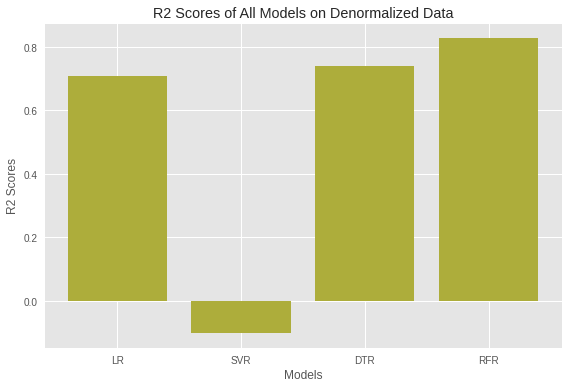

In [89]:
plt.style.use('ggplot')
models = ['LR', 'SVR', 'DTR', 'RFR']
r2_scores = [led_lin_r2, led_svr_r2, led_dtr_r2, led_rfr_r2]

# Automatical sets the range if number of bins are defined
plt.bar(models, r2_scores, color='#adad3b')

plt.title('R2 Scores of All Models on Denormalized Data')
plt.xlabel('Models')
plt.ylabel('R2 Scores')
plt.tight_layout()
plt.show()

- **Performance Comparison Among Four Regression Algorithms on Normalized Label Encoded Data**

In [90]:
len_lin_r2 = r2_score(ny_test, len_lin_pred)
len_svr_r2 = r2_score(ny_test, len_svr_pred)
len_dtr_r2 = r2_score(ny_test, len_dtr_pred)
len_rfr_r2 = r2_score(ny_test, len_rfr_pred)

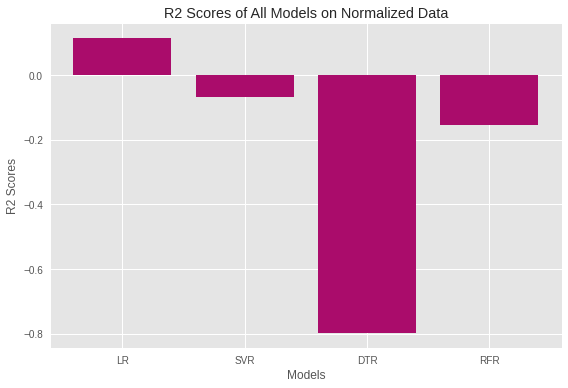

In [91]:
plt.style.use('ggplot')
models = ['LR', 'SVR', 'DTR', 'RFR']
r2_scores = [len_lin_r2, len_svr_r2, len_dtr_r2, len_rfr_r2]

# Automatical sets the range if number of bins are defined
plt.bar(models, r2_scores, color='#AA0C6B')

plt.title('R2 Scores of All Models on Normalized Data')
plt.xlabel('Models')
plt.ylabel('R2 Scores')
plt.tight_layout()
plt.show()

- **Performance Comparison Among Four Regression Algorithms on Denormalized One-Hot Encoded Data**

In [92]:
ohed_lin_r2 = r2_score(y_test, ohed_lin_pred)
ohed_svr_r2 = r2_score(y_test, ohed_svr_pred)
ohed_dtr_r2 = r2_score(y_test, ohed_dtr_pred)
ohed_rfr_r2 = r2_score(y_test, ohed_rfr_pred)

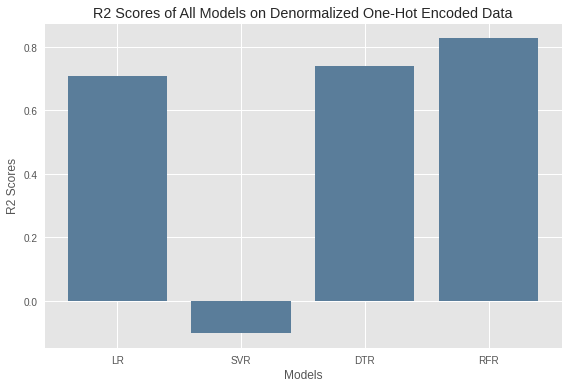

In [93]:
plt.style.use('ggplot')
models = ['LR', 'SVR', 'DTR', 'RFR']
r2_scores = [ohed_lin_r2, ohed_svr_r2, ohed_dtr_r2, ohed_rfr_r2]

# Automatical sets the range if number of bins are defined
plt.bar(models, r2_scores, color='#5a7d9a')

plt.title('R2 Scores of All Models on Denormalized One-Hot Encoded Data')
plt.xlabel('Models')
plt.ylabel('R2 Scores')
plt.tight_layout()
plt.show()

- **Performance Comparison Among Four Regression Algorithms on Normalized One-Hot Encoded Data**

In [94]:
ohen_lin_r2 = r2_score(ny_test, ohen_lin_pred)
ohen_svr_r2 = r2_score(ny_test, ohen_svr_pred)
ohen_dtr_r2 = r2_score(ny_test, ohen_dtr_pred)
ohen_rfr_r2 = r2_score(ny_test, ohen_rfr_pred)

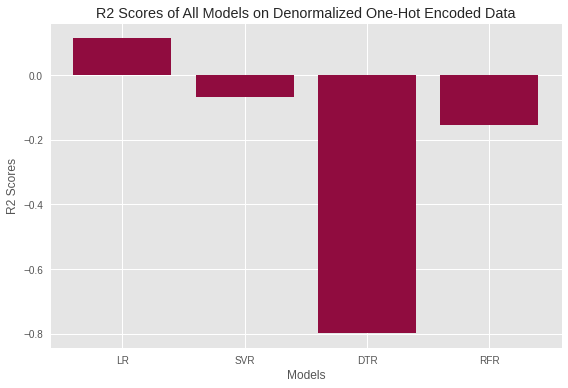

In [95]:
plt.style.use('ggplot')
models = ['LR', 'SVR', 'DTR', 'RFR']
r2_scores = [ohen_lin_r2, ohen_svr_r2, ohen_dtr_r2, ohen_rfr_r2]

# Automatical sets the range if number of bins are defined
plt.bar(models, r2_scores, color='#900C3F')

plt.title('R2 Scores of All Models on Denormalized One-Hot Encoded Data')
plt.xlabel('Models')
plt.ylabel('R2 Scores')
plt.tight_layout()
plt.show()

- **Performance Comparison Among Four Regression Algorithms on Denormalized Label Encoded vs One-Hot Encoded Data**

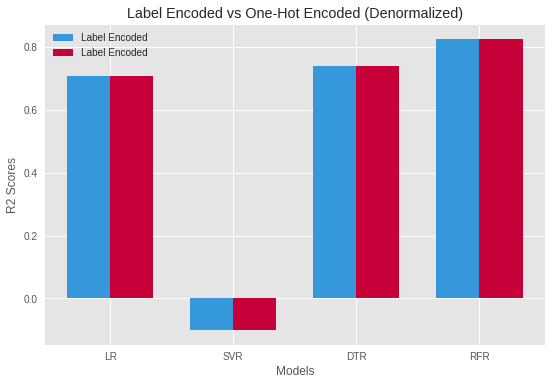

In [96]:
plt.style.use('ggplot')
width = 0.35

models = ['LR', 'SVR', 'DTR', 'RFR']
x_indices = np.arange(len(models))

led_r2_scores = [led_lin_r2, led_svr_r2, led_dtr_r2, led_rfr_r2]
plt.bar(x_indices, led_r2_scores, width=width, color='#3498DB', label='Label Encoded')

ohed_r2_scores = [ohed_lin_r2, ohed_svr_r2, ohed_dtr_r2, ohed_rfr_r2]
plt.bar(x_indices+width, led_r2_scores, width=width, color='#C70039', label='Label Encoded')

plt.legend()
plt.xticks(ticks=x_indices+((width)/2), labels=models)
plt.title('Label Encoded vs One-Hot Encoded (Denormalized)')
plt.xlabel('Models')
plt.ylabel('R2 Scores')
plt.show()

- **Performance Comparison Among Four Regression Algorithms on Normalized Label Encoded vs One-Hot Encoded Data**

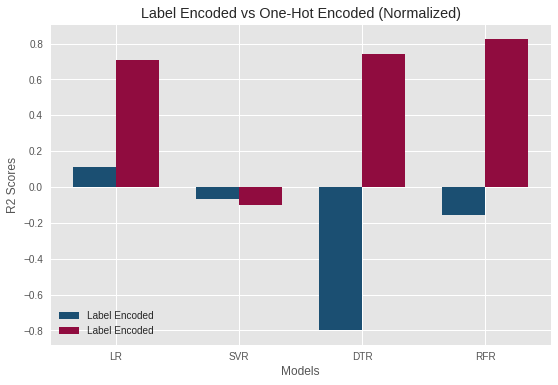

In [97]:
plt.style.use('ggplot')
width = 0.35

models = ['LR', 'SVR', 'DTR', 'RFR']
x_indices = np.arange(len(models))

len_r2_scores = [len_lin_r2, len_svr_r2, len_dtr_r2, len_rfr_r2]
plt.bar(x_indices, len_r2_scores, width=width, color='#1B4F72', label='Label Encoded')

ohen_r2_scores = [ohen_lin_r2, ohen_svr_r2, ohen_dtr_r2, ohen_rfr_r2]
plt.bar(x_indices+width, led_r2_scores, width=width, color='#900C3F', label='Label Encoded')

plt.legend()
plt.xticks(ticks=x_indices+((width)/2), labels=models)
plt.title('Label Encoded vs One-Hot Encoded (Normalized)')
plt.xlabel('Models')
plt.ylabel('R2 Scores')
plt.show()

### Findings:
- Performance of the **Random Forest Regression** model was better for label encoded & one-hot encoded denormalized data.
- For normalized data **Linear Regression** model performed better for label encoded and one-hot encoded data.
- The overall performance of all the models based on the loss are not quite satisfactory as the target value has a very weak correlation with the features. However, a better performance might be obtained if polynomial regression could be used as there are multiple features in the dataset.